In [187]:
# the libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from  sklearn.preprocessing import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing
import pandas as pd

nba_df = pd.read_csv('final_data/nba_5_recent_perfomance.csv')
#nba_df['HOME_TEAM_WINS'] = nba_df['HOME_TEAM_WINS'].apply(lambda value: 'NO' if value == 0 else 'YES')

In [188]:
nba_df.head(30)

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,PTS_away_avg,FG_PCT_away_avg,FT_PCT_away_avg,FG3_PCT_away_avg,AST_away_avg,...,EFG_home_avg,PTS_FGA_home_avg,PIE_home_avg,POSS_home_avg,PACE_home_avg,OFF_EFC_home_avg,DEF_EFC_home_avg,ELO_BEFORE_home,ELO_BEFORE_away,HOME_TEAM_WINS
0,2010-10-26,21000003,LAL,HOU,2010,110.0,0.42,0.93,0.40,25.0,...,0.45,0.90,9.85,102.32,102.94,109.0,108.0,1500.000000,1500.000000,1
1,2010-10-26,21000002,POR,PHX,2010,92.0,0.49,0.69,0.47,15.0,...,0.51,1.01,13.56,82.14,91.61,114.0,106.0,1500.000000,1500.000000,1
2,2010-10-26,21000001,BOS,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,0.57,1.13,12.08,77.86,91.57,96.0,98.0,1500.000000,1500.000000,1
3,2010-10-27,21000004,CLE,BOS,2010,80.0,0.36,0.72,0.40,15.0,...,0.50,0.99,8.31,85.78,85.36,111.0,91.0,1500.000000,1507.299516,1
4,2010-10-27,21000005,BKN,DET,2010,98.0,0.45,0.53,0.42,21.0,...,0.58,1.17,9.88,86.02,94.17,113.0,114.0,1500.000000,1500.000000,1
5,2010-10-27,21000006,PHI,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,0.54,1.08,10.97,82.62,96.72,102.0,110.0,1500.000000,1492.700484,0
6,2010-10-27,21000007,TOR,NYK,2010,98.0,0.43,0.88,0.29,12.0,...,0.32,0.64,7.62,87.86,99.09,94.0,108.0,1500.000000,1500.000000,0
7,2010-10-27,21000008,MEM,ATL,2010,119.0,0.52,0.87,0.50,20.0,...,0.45,0.90,9.26,88.44,111.09,105.0,126.0,1500.000000,1500.000000,0
8,2010-10-27,21000009,MIN,SAC,2010,117.0,0.46,0.74,0.36,25.0,...,0.49,0.98,9.83,95.75,104.42,111.0,118.0,1500.000000,1500.000000,0
9,2010-10-27,21000016,LAC,POR,2010,92.0,0.49,0.69,0.47,15.0,...,0.44,0.87,8.92,79.85,86.68,101.0,115.0,1500.000000,1510.340441,0


In [189]:
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'], format='%Y-%m-%d')

In [190]:
cols_delete = ['GAME_DATE', 'GAME_ID', 'H_NAME', 'A_NAME', 'SEASON', 'HOME_TEAM_WINS']
def get_features_labels_from_df(df, cols_to_delete, label_col):
    return df.drop(cols_to_delete, axis=1), df[label_col]

In [191]:
features, labels = get_features_labels_from_df(nba_df, cols_delete, 'HOME_TEAM_WINS')

In [192]:
def get_normalized_features(features):
    cols_names = features.columns
    tmp = preprocessing.normalize(features)
    return pd.DataFrame(tmp, columns=cols_names)

def get_powertrasform_data(features):
    # perform a yeo-johnson transform of the dataset
    pt = PowerTransformer(method='yeo-johnson')
    return pd.DataFrame(pt.fit_transform(features))

def get_robust_scaled_data(features):
    robust_scaler = RobustScaler()
    robust_scaler.fit(features)
    return pd.DataFrame(robust_scaler.transform(features))

def get_standard_scaled_data(features):
    robust_scaler = StandardScaler()
    robust_scaler.fit(features)
    return pd.DataFrame(robust_scaler.transform(features))

In [193]:
#normalized_features = get_powertrasform_data(features)
normalized_features =  get_standard_scaled_data(features)

In [194]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.95)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.3, random_state=42, shuffle=True)

In [197]:
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [198]:
X_test.shape

(4244, 36)

In [207]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define model
model = LogisticRegression(random_state=42)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 200)
# define search
scoring = [
    'accuracy', 'balanced_accuracy', 'f1', 'roc_auc'
]
search = RandomizedSearchCV(model, space, n_iter=300, scoring=scoring, refit='accuracy', n_jobs=-1, cv=cv, random_state=42, verbose=0)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2535 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
645 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/biagiolicari/miniforge3/

Best Score: 0.6695966224588134
Best Hyperparameters: {'C': 0.006038034210537698, 'penalty': 'l2', 'solver': 'liblinear'}


In [255]:
from sklearn.model_selection import cross_val_score

#Best Score: 0.6696957125917773
#Best Hyperparameters: {'C': 0.002655401814147033, 'penalty': 'l2', 'solver': 'lbfgs'}

#Best Score: 0.6695608965538329
#Best Hyperparameters: {'C': 0.0017597884168895975, 'penalty': 'l2', 'solver': 'newton-cg'}

#Best Score: 0.6697293146738154
#Best Hyperparameters: {'C': 0.006515345427343321, 'penalty': 'l2', 'solver': 'newton-cg'}

#Best Score: 0.6695966224588134
#Best Hyperparameters: {'C': 0.006038034210537698, 'penalty': 'l2', 'solver': 'liblinear'}

#Best Score: 0.6702695302341944
#Best Hyperparameters: {'C': 0.0033758118699318837, 'penalty': 'l2', 'solver': 'lbfgs'}

weights = {0:1.3, 1:0.9}
log_regr_model = LogisticRegression(random_state=42, C=0.006038034210537698, penalty='l2', solver='liblinear')
scores = cross_val_score(log_regr_model, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.011787959700597175
mean: 0.6669030537581775
[0.66128218 0.65707071 0.68383838 0.66616162 0.66969697 0.6476527
 0.66515152 0.68636364 0.65656566 0.66717172 0.6703685  0.65606061
 0.66161616 0.69191919 0.66262626]


LogisticRegression(C=1.8, random_state=42, solver='liblinear')

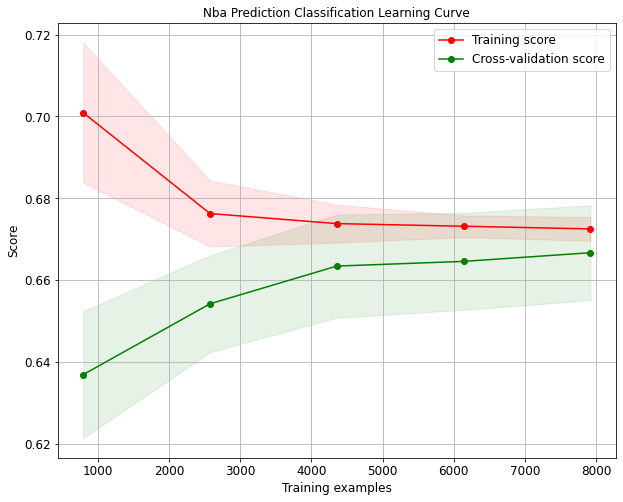

In [268]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(log_regr_model, X_train, y_train,
                                     cv=cv, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,8), title_fontsize="large", text_fontsize="large",
                                     title="Nba Prediction Classification Learning Curve");

In [211]:
log_regr_model.fit(X_train, y_train)
log_regr_predict = log_regr_model.predict(X_test)
log_reg_prediction_prob = log_regr_model.predict_proba(X_test)

In [212]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
print(metrics.classification_report(y_test, log_regr_predict))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1752
           1       0.68      0.78      0.73      2492

    accuracy                           0.66      4244
   macro avg       0.64      0.63      0.63      4244
weighted avg       0.65      0.66      0.65      4244



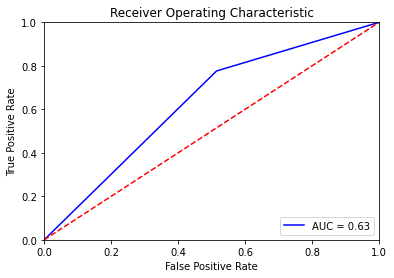

In [213]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, log_regr_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


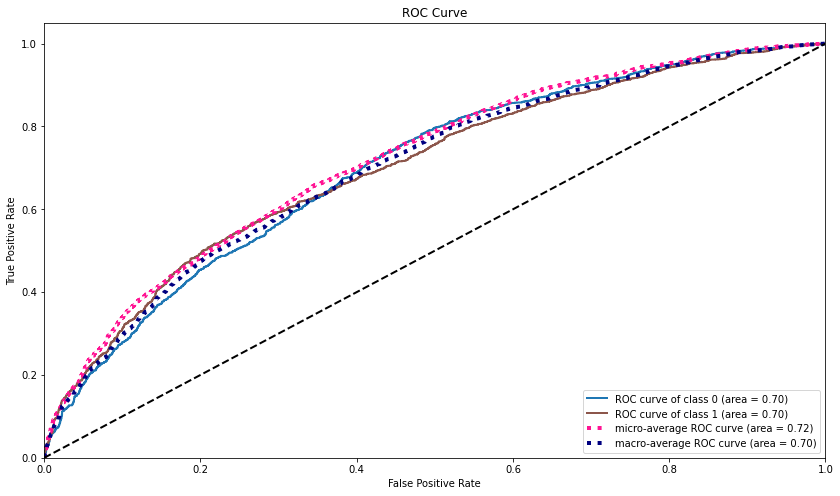

In [272]:
skplt.metrics.plot_roc_curve(y_test, log_reg_prediction_prob,
                             title="ROC Curve", figsize=(14,8), cmap='tab10');

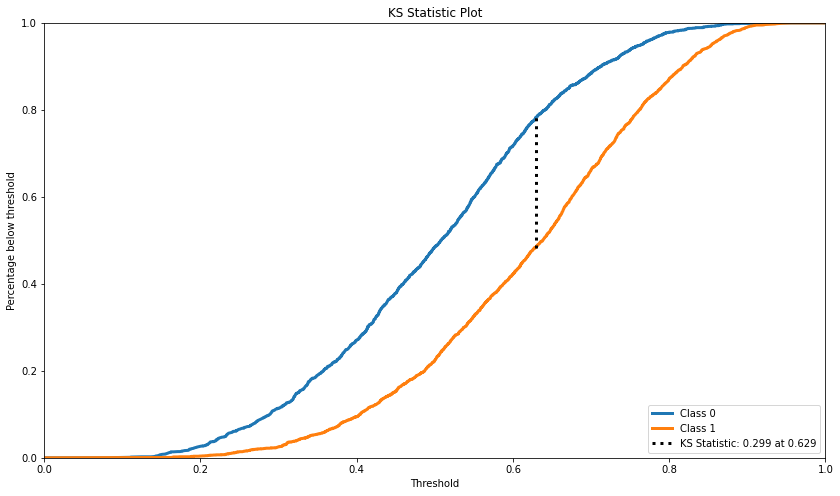

In [274]:
skplt.metrics.plot_ks_statistic(y_test, log_reg_prediction_prob, figsize=(14,8));

<AxesSubplot:>

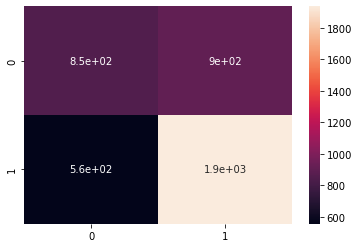

In [276]:
conf_matrix = metrics.confusion_matrix(y_test, log_regr_predict)
sns.heatmap(conf_matrix, annot=True)

In [224]:
def get_prediction_df(pred_prob, pred, full_df, test_df):
    concat = [pd.DataFrame(log_reg_prediction_prob), pd.DataFrame(log_regr_predict)]
    final_prediction = pd.concat(concat, axis=1)
    final_prediction.columns = ['AWAY_WIN_PROBABILITY', 'HOME_WIN_PROBABILITY', 'RESULT_PREDICTION']
    final_prediction['RESULT_PREDICTION'] = final_prediction['RESULT_PREDICTION'].apply(lambda value: 'Away Team Win' if value == 0 else 'Home Team Win')
    games = pd.merge(full_df, pd.DataFrame(test_df), left_index=True, right_index=True)
    games = games.iloc[:,0:5].copy()
    final_prediction = pd.concat([games.reset_index(drop=True), final_prediction], axis=1)
    return final_prediction

In [225]:
final_prediction_nba_log_regr = get_prediction_df(log_reg_prediction_prob, log_regr_predict, nba_df, X_test)
final_prediction_nba_log_regr

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,AWAY_WIN_PROBABILITY,HOME_WIN_PROBABILITY,RESULT_PREDICTION
0,2010-10-26,21000003,LAL,HOU,2010,0.642646,0.357354,Away Team Win
1,2010-10-27,21000004,CLE,BOS,2010,0.423994,0.576006,Home Team Win
2,2010-10-27,21000009,MIN,SAC,2010,0.289649,0.710351,Home Team Win
3,2010-10-27,21000015,GSW,HOU,2010,0.120120,0.879880,Home Team Win
4,2010-10-27,21000010,NOP,MIL,2010,0.663390,0.336610,Away Team Win
...,...,...,...,...,...,...,...,...
4239,2021-11-16,22100210,BKN,GSW,2021,0.631375,0.368625,Away Team Win
4240,2021-11-17,22100222,PHX,DAL,2021,0.608291,0.391709,Away Team Win
4241,2021-11-17,22100219,MIL,LAL,2021,0.299184,0.700816,Home Team Win
4242,2021-11-17,22100214,DET,IND,2021,0.324778,0.675222,Home Team Win


# Random Forest Classifier Model
### We will also try another model: a Random Forest Classifier. We will optimize parameters using a similar process as above.

In [150]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)
log_regr_model.fit(X_train, y_train)

std: 0.00903453688634969
mean: 0.649463404021708
[0.63048965 0.64242424 0.66262626 0.64444444 0.65555556 0.65118627
 0.6520202  0.65909091 0.64444444 0.63838384 0.65522463 0.64494949
 0.64444444 0.66515152 0.65151515]


LogisticRegression(C=0.0033758118699318837, random_state=42)

In [277]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [0,
               5,
               10,
               15,
               21,
               26,
               31,
               36,
               42,
               47,
               52,
               57,
               63,
               68,
               73,
               78,
               84,
               89,
               94,
               100,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0,
                  68,
                  137,
                  206,
                  275,
                  344,
                  413,
                  482,
                  551,
                  620,
                  689,
                  758,
                  827,
                  896,
                  965,
                  1034,
                  1103,
                  1172,
                  1241,
                  1310,
                  1379,
               

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier(random_state=42)
# Random search of parameters, using 2-fold cross validation,
# search across 100 different combinations, and use all available cores
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = cv, verbose=0, n_jobs = 8, random_state=42)
# Fit the random search model
rfc_random.fit(X_train, y_train)
print('Best Score: %s' % rfc_random.best_score_)
print('Best Hyperparameters: %s' % rfc_random.best_params_)
y_pred_rfr_random = rfc_random.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_rfr_random))

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_bagging = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_bagging = grid_search_bagging.fit(normalized_features, labels)
# summarize results
print("Best: %f using %s" % (grid_result_bagging.best_score_, grid_result_bagging.best_params_))
means = grid_result_bagging.cv_results_['mean_test_score']
stds = grid_result_bagging.cv_results_['std_test_score']
params = grid_result_bagging.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [373]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_random_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_random_forest = grid_search_random_forest.fit(normalized_features, labels)
# summarize results
print("Best: %f using %s" % (grid_result_random_forest.best_score_, grid_result_random_forest.best_params_))
means = grid_result_random_forest.cv_results_['mean_test_score']
stds = grid_result_random_forest.cv_results_['std_test_score']
params = grid_result_random_forest.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.614414 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.596930 (0.010914) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.613337 (0.011797) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.614414 (0.012482) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.598351 (0.010025) with: {'max_features': 'log2', 'n_estimators': 10}
0.612773 (0.011200) with: {'max_features': 'log2', 'n_estimators': 100}
0.614414 (0.011090) with: {'max_features': 'log2', 'n_estimators': 1000}


In [375]:
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_svm = grid_search_svm.fit(normalized_features, labels)
# summarize results
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))
means = grid_result_svm.cv_results_['mean_test_score']
stds = grid_result_svm.cv_results_['std_test_score']
params = grid_result_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 